Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Как сделать это с помощью scikit-learn, написано [здесь](http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository). MNIST Handwritten Digits – это 70 тысяч распознанных рукописных изображений цифр, каждое размером 28 $\times$ 28 пикселей. Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


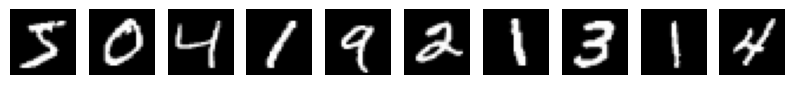

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, v_measure_score
import matplotlib.pyplot as plt

# Загрузка датасета MNIST Handwritten Digits (первые 1000 наблюдений)
mnist_subset = fetch_openml('mnist_784', version=1)
mnist_subset.data = mnist_subset.data[:1000]
mnist_subset.target = mnist_subset.target[:1000]

# Визуализация нескольких изображений из датасета
images = mnist_subset.data.to_numpy()[:10].reshape(-1, 28, 28)
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [9]:
# Уменьшение размерности с использованием PCA (20 компонентов)
pca = PCA(n_components=20)
mnist_pca = pca.fit_transform(mnist_subset.data)

In [11]:
# Кластеризация с использованием AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_clustering.fit_predict(mnist_pca)

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=10, n_init=100)
kmeans_labels = kmeans.fit_predict(mnist_pca)

# Оценка качества кластеризации
silhouette_agg = silhouette_score(mnist_pca, agg_labels)
v_measure_agg = v_measure_score(mnist_subset.target[:mnist_pca.shape[0]], agg_labels)

silhouette_kmeans = silhouette_score(mnist_pca, kmeans_labels)
v_measure_kmeans = v_measure_score(mnist_subset.target[:mnist_pca.shape[0]], kmeans_labels)


In [12]:
# Вывод результатов
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_agg}")
print(f"V-Measure Score (Agglomerative Clustering): {v_measure_agg}")
print()
print(f"Silhouette Score (KMeans): {silhouette_kmeans}")
print(f"V-Measure Score (KMeans): {v_measure_kmeans}")

Silhouette Score (Agglomerative Clustering): 0.12101727068967318
V-Measure Score (Agglomerative Clustering): 0.5619073143735197

Silhouette Score (KMeans): 0.15395622214410143
V-Measure Score (KMeans): 0.48816406519102057


Метрики после 1 запуска

Silhouette Score (Agglomerative Clustering): 0.12101727068967318

V-Measure Score (Agglomerative Clustering): 0.5619073143735197

Silhouette Score (KMeans): 0.15395622214410143

V-Measure Score (KMeans): 0.48816406519102057

In [13]:
# Выберем другие кол-во компонет
pca = PCA(n_components=50)
mnist_pca = pca.fit_transform(mnist_subset.data)

In [14]:
# Кластеризация с использованием AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_clustering.fit_predict(mnist_pca)

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=10, n_init=100)
kmeans_labels = kmeans.fit_predict(mnist_pca)

# Оценка качества кластеризации
silhouette_agg = silhouette_score(mnist_pca, agg_labels)
v_measure_agg = v_measure_score(mnist_subset.target[:mnist_pca.shape[0]], agg_labels)

silhouette_kmeans = silhouette_score(mnist_pca, kmeans_labels)
v_measure_kmeans = v_measure_score(mnist_subset.target[:mnist_pca.shape[0]], kmeans_labels)


In [15]:
# Вывод новых результатов
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_agg}")
print(f"V-Measure Score (Agglomerative Clustering): {v_measure_agg}")
print()
print(f"Silhouette Score (KMeans): {silhouette_kmeans}")
print(f"V-Measure Score (KMeans): {v_measure_kmeans}")

Silhouette Score (Agglomerative Clustering): 0.0793407220352043
V-Measure Score (Agglomerative Clustering): 0.5530985344964451

Silhouette Score (KMeans): 0.1093158858007106
V-Measure Score (KMeans): 0.4764185145794873


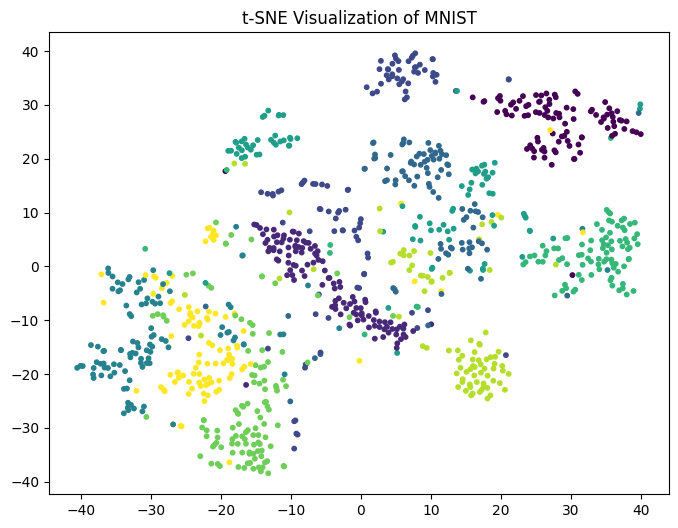

V-Measure Score (Agglomerative Clustering, t-SNE): 0.6103053728139821
V-Measure Score (KMeans, t-SNE): 0.6078544306166254


In [17]:
from sklearn.manifold import TSNE

# Применение t-SNE к данным
tsne = TSNE(n_components=2, random_state=42)
mnist_tsne = tsne.fit_transform(mnist_subset.data)

# Визуализация t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(mnist_tsne[:, 0], mnist_tsne[:, 1], c=mnist_subset.target.astype(int), cmap='viridis', s=10)
plt.title('t-SNE Visualization of MNIST')
plt.show()

# Кластеризация с использованием AgglomerativeClustering на данных t-SNE
agg_clustering_tsne = AgglomerativeClustering(n_clusters=10)
agg_labels_tsne = agg_clustering_tsne.fit_predict(mnist_tsne)

# Кластеризация с использованием KMeans на данных t-SNE
kmeans_tsne = KMeans(n_clusters=10, n_init=100)
kmeans_labels_tsne = kmeans_tsne.fit_predict(mnist_tsne)

# Оценка качества кластеризации на данных t-SNE
v_measure_agg_tsne = v_measure_score(mnist_subset.target[:mnist_tsne.shape[0]], agg_labels_tsne)
v_measure_kmeans_tsne = v_measure_score(mnist_subset.target[:mnist_tsne.shape[0]], kmeans_labels_tsne)

# Вывод результатов для данных t-SNE
print(f"V-Measure Score (Agglomerative Clustering, t-SNE): {v_measure_agg_tsne}")
print(f"V-Measure Score (KMeans, t-SNE): {v_measure_kmeans_tsne}")



Метрики V-меры улучшились